In [23]:
import numpy as np
import seaborn as sb
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

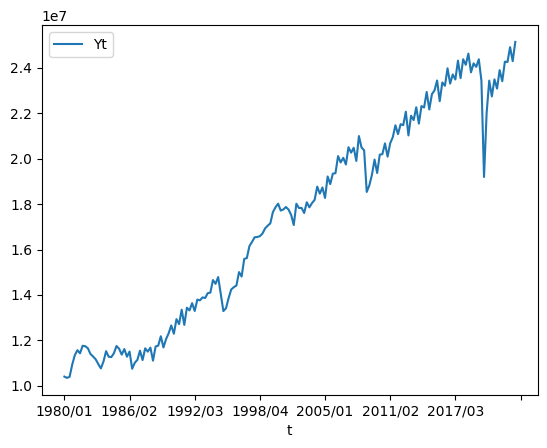

In [33]:
series = read_csv('./pib.csv', header=0, index_col=0)
series.plot()
pyplot.show()

In [34]:
from statsmodels.tsa.stattools import adfuller
series0 = series [['Yt']]
X = series0.values
result = adfuller(X, maxlag = 13, regression='ct', autolag='BIC', store=False, regresults=False)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
adfuller

ADF Statistic: -3.297195
p-value: 0.066715


<function statsmodels.tsa.stattools.adfuller(x, maxlag: 'int | None' = None, regression='c', autolag='AIC', store=False, regresults=False)>

In [38]:
series

,Yt,ret
t,,
1980/01,1.040137e+07,NaN
1980/02,1.034235e+07,-0.005674
1980/03,1.039273e+07,0.004872
1980/04,1.092767e+07,0.051472
1981/01,1.134585e+07,0.038268
...,...,...
2022/02,2.427615e+07,0.036730
2022/03,2.426305e+07,-0.000540
2022/04,2.491642e+07,0.026928


In [36]:
series['ret'] = series['Yt'].pct_change()
series1 = series [['ret']]
series1 = series1.iloc[1:]
X = series1.values
result = adfuller(X, maxlag = 13, regression='ct', autolag='BIC', store=False, regresults=False)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -11.419833
p-value: 0.000000


In [39]:
series2 = pd.concat([series, pd.get_dummies(series.index)], axis=1)


series1 = series2 [['ret','2009/01','2020/02' ]]
series1 = series1.iloc[1:]
series3 = series1 [['ret']]
series4 = series1 [['2009/01', '2020/02']]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


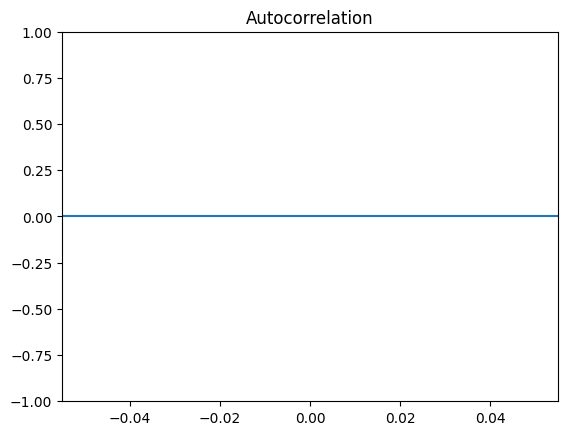

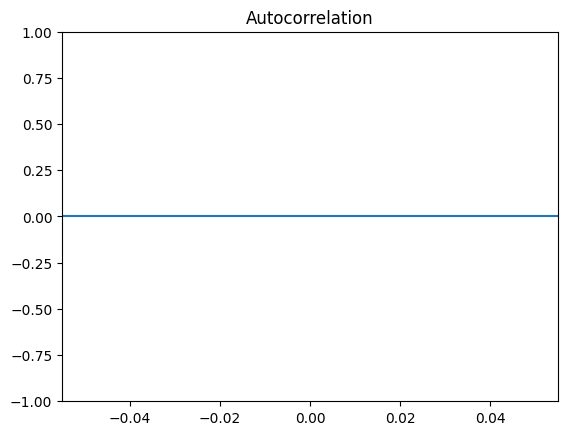

In [40]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
plot_acf(series3)
